# Word Cloud

In [1]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from skimage import transform
import matplotlib.pyplot as plt

In [2]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [3]:
twitter_mask = np.array(Image.open("data/mask_marco.png"))

In [4]:
transformed_twitter_mask = np.ndarray((twitter_mask.shape[0],twitter_mask.shape[1]), np.int32)

for i in range(len(twitter_mask)):
    transformed_twitter_mask[i] = list(map(transform_format, twitter_mask[i]))

In [5]:
df = pd.read_csv("data/processed_data.csv", sep = ",")
# drop tweet list na 
df["tweet_list"] = df["tweet_clean"].str.split(" ").tolist()
df.dropna(inplace = True)
df = df.reset_index(drop = True)# drop 2 NA because tweet is empty
df.head()

,count,hate_speech,offensive_language,neither,class,tweet,tweet_clean,tweet_list
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,woman shouldnt complain clean hous man alway t...,"[woman, shouldnt, complain, clean, hous, man, ..."
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,boy dat cold tyga dwn bad cuffin dat hoe st place,"[boy, dat, cold, tyga, dwn, bad, cuffin, dat, ..."
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,dawg ever fuck bitch start cri confus shit,"[dawg, ever, fuck, bitch, start, cri, confus, ..."
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,look like tranni,"[look, like, tranni]"
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,shit hear might true might faker bitch told ya,"[shit, hear, might, true, might, faker, bitch,..."


In [6]:
df_group = df.groupby(["class"])['tweet_clean'].apply(lambda x: ' '.join(x)).reset_index()
df_group.head()

,class,tweet_clean
0,0,queer gaywad alsarabsss he beaner smh tell he ...
1,1,boy dat cold tyga dwn bad cuffin dat hoe st pl...
2,2,woman shouldnt complain clean hous man alway t...


(-0.5, 1279.5, 719.5, -0.5)

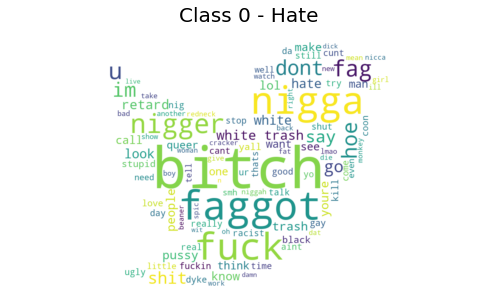

In [22]:
text = df_group.tweet_clean[0]
wc = WordCloud(background_color="white", max_words=100, mask=transformed_twitter_mask).generate(text)

fig, ax = plt.subplots(figsize=(18, 5))
ax.set_title("Class 0 - Hate", size = 20)
ax.imshow(wc, interpolation='bilinear')
ax.axis("off")

(-0.5, 1279.5, 719.5, -0.5)

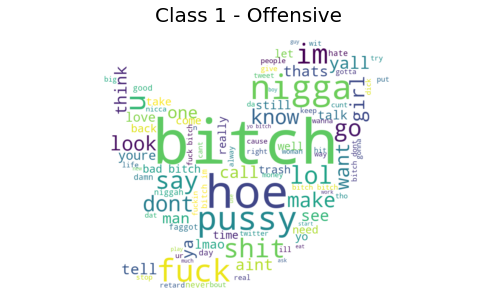

In [23]:
text = df_group.tweet_clean[1]
wc = WordCloud(background_color="white", max_words=100, mask=transformed_twitter_mask).generate(text)

fig, ax = plt.subplots(figsize=(18, 5))
ax.set_title("Class 1 - Offensive", size = 20)
ax.imshow(wc, interpolation='bilinear')
ax.axis("off")

(-0.5, 1279.5, 719.5, -0.5)

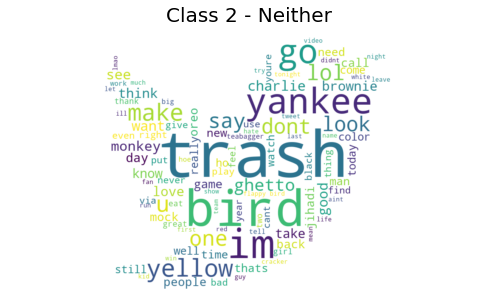

In [24]:
text = df_group.tweet_clean[2]
wc = WordCloud(background_color="white", max_words=100, mask=transformed_twitter_mask).generate(text)

fig, ax = plt.subplots(figsize=(18, 5))
ax.set_title("Class 2 - Neither", size = 20)
ax.imshow(wc, interpolation='bilinear')
ax.axis("off")

## Binary Version

In [7]:
df["class_bin"] = 0
df.loc[df["class"] <= 1, "class_bin"] = 1

In [8]:
df_group_2 = df.groupby(["class_bin"])['tweet_clean'].apply(lambda x: ' '.join(x)).reset_index()
df_group_2.head()

,class_bin,tweet_clean
0,0,woman shouldnt complain clean hous man alway t...
1,1,boy dat cold tyga dwn bad cuffin dat hoe st pl...


(-0.5, 1279.5, 719.5, -0.5)

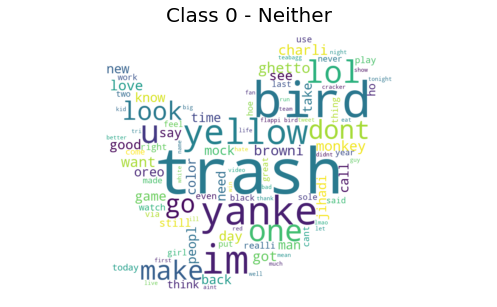

In [9]:
text = df_group_2.tweet_clean[0]
wc = WordCloud(background_color="white", max_words=100, mask=transformed_twitter_mask).generate(text)

fig, ax = plt.subplots(figsize=(18, 5))
ax.set_title("Class 0 - Neither", size = 20)
ax.imshow(wc, interpolation='bilinear')
ax.axis("off")

(-0.5, 1279.5, 719.5, -0.5)

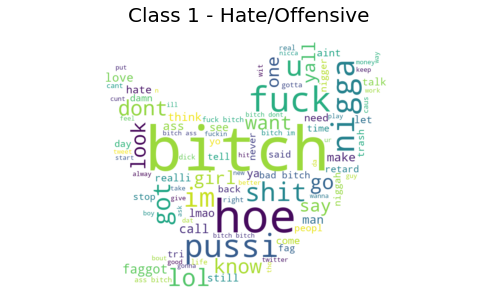

In [10]:
text = df_group_2.tweet_clean[1]
wc = WordCloud(background_color="white", max_words=100, mask=transformed_twitter_mask).generate(text)

fig, ax = plt.subplots(figsize=(18, 5))
ax.set_title("Class 1 - Hate/Offensive", size = 20)
ax.imshow(wc, interpolation='bilinear')
ax.axis("off")